In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
#data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=180,  # Randomly rotate ,range
    brightness_range=[0.8, 1.2],  # Randomly change brightness
    horizontal_flip=True,  # Randomly flip images
    fill_mode='nearest'  # Fill mode for new pixels
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Load the original image
img_path = '/content/drive/My Drive/val2017/000000581781.jpg'
img = tf.keras.preprocessing.image.load_img(img_path)
img = tf.keras.preprocessing.image.img_to_array(img)
img = img.reshape((1,) + img.shape)  # Reshape to (1, height, width, channels)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
augmented_images = []
for batch in datagen.flow(img, batch_size=1):
    augmented_images.append(batch[0])
    if len(augmented_images) >= 5:  # Generate 5 augmented images
        break

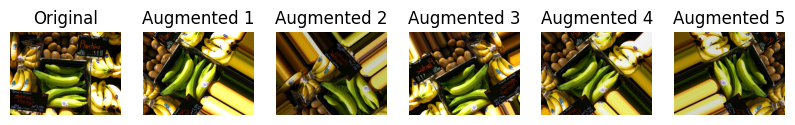

In [ ]:
# Display og and aug images
plt.figure(figsize=(10, 5))
plt.subplot(1, 6, 1)
plt.imshow(img[0] / 255.0)  #og image
plt.axis('off')
plt.title('Original')

for i, img in enumerate(augmented_images):
    plt.subplot(1, 6, i + 2)
    plt.imshow(img / 255.0)  # Augm images
    plt.axis('off')
    plt.title(f'Augmented {i + 1}')

plt.show()